In [1]:
import dill
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
#from lightfm import LightFM
#from lightfm.data import Dataset
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
book_tags = pd.read_csv("../data/book_tags.csv")
books = pd.read_csv("../data/books.csv")
ratings = pd.read_csv("../data/ratings.csv")
to_read = pd.read_csv("../data/to_read.csv")
tags = pd.read_csv("../data/tags.csv")
books_more_info = pd.read_csv("../data/google_info_books_v2.csv")

"""
def parse_category(category):
    try:
        return json.loads(category.replace('"', '`').replace("'", '"').replace("`", "''"))[0].lower()
    except:
        return json.loads(category)[0].lower()

books_more_info['volumeInfo.categories'] = books_more_info['volumeInfo.categories'].apply(lambda x: parse_category(x) 
                                                                                          if type(x) != float else np.nan)
genres = []
for cats in books_more_info['volumeInfo.categories'].dropna().values:
    tmp = []
    try:
        tmp = json.loads(cats.replace('"', '`').replace("'", '"').replace("`", "''"))
    except:
        tmp = json.loads(cats)
    genres += tmp
genres = list(set(genres))"""

genres = books_more_info['volumeInfo.categories'].unique()

print("Количество различных жанров:", genres.shape[0])
print("Пара случайных жанров:", np.random.choice(genres, size=5))

books['isbn'] = books['isbn'].astype('str')
books['isbn13'] = books['isbn13'].apply(lambda x: str(int(x)) if not np.isnan(x) else np.nan).astype('str')

user_ids = ratings['user_id'].unique()
book_ids = books['book_id'].unique()
print(f'Пользователей: {user_ids.shape[0]}\nКниг: {book_ids.shape[0]}')

Количество различных жанров: 554
Пара случайных жанров: ['imaginary wars and battles' 'children of the rich' 'defectors'
 'gardening' 'names, personal']
Пользователей: 53424
Книг: 10000


In [3]:
# Частота встречаемости жанров
books_more_info['volumeInfo.categories'].value_counts()

fiction                           2350
juvenile fiction                   916
biography & autobiography          246
comics & graphic novels            181
history                             98
                                  ... 
transportation                       1
alienation (social psychology)       1
commutative rings                    1
bank robberies                       1
men                                  1
Name: volumeInfo.categories, Length: 586, dtype: int64

In [25]:
books_more_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5291 entries, 0 to 5290
Data columns (total 62 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           5291 non-null   int64  
 1   kind                                                 5291 non-null   object 
 2   id                                                   5291 non-null   object 
 3   etag                                                 5291 non-null   object 
 4   selfLink                                             5291 non-null   object 
 5   volumeInfo.title                                     5291 non-null   object 
 6   volumeInfo.authors                                   5196 non-null   object 
 7   volumeInfo.publisher                                 4517 non-null   object 
 8   volumeInfo.publishedDate                             5267 non-null  

In [26]:
books_more_info['isbn13'] = books_more_info['isbn13'].astype('str')

In [31]:
np.sum(books.merge(books_more_info, on='isbn', how='left')['volumeInfo.categories'].isna())

9198

In [11]:
np.sum((books['isbn'] == 'nan') & (books['isbn13'] == 'nan'))

565

In [48]:
genres[:100].values

array([['fiction', 2350],
       ['juvenile fiction', 916],
       ['biography & autobiography', 246],
       ['comics & graphic novels', 181],
       ['history', 98],
       ['business & economics', 85],
       ['religion', 71],
       ['young adult fiction', 57],
       ['juvenile nonfiction', 43],
       ['drama', 38],
       ['self-help', 34],
       ['poetry', 34],
       ['science', 33],
       ['detective and mystery stories', 33],
       ['family & relationships', 32],
       ['cooking', 32],
       ['humor', 30],
       ["children's stories", 27],
       ['philosophy', 25],
       ['art', 25],
       ['health & fitness', 25],
       ['fantasy fiction', 24],
       ['psychology', 23],
       ['comic books, strips, etc', 22],
       ['literary collections', 22],
       ['political science', 22],
       ['body, mind & spirit', 22],
       ['social science', 19],
       ['adventure stories', 18],
       ['english fiction', 15],
       ['nature', 15],
       ['animals', 13],
      

**Основные процессы**

* Приобретение ПО
* Передача ПО в использование
* Разработка ПО
* Эксплуатация ПО

**Поддерживающие процессы**

* Поддержка ПО
* Документирование ПО
* Управление конфигурацией
* Обеспечение качества
* Верификация
* Валидация
* Экспертиза
* Аудит
* Решение проблем

**Организация процесса разработки**
* Управление проектом
* Управление инфраструктуров
* Cовершенствование процессов
* Управление персоналом

Инфраструктура - окружение, необходимое для эффективного функционирования

**Адаптация**
* Адаптация процессов под нужды конкретного проекта

**Процессы выработки соглашений**
* Приобретение
* Поставка (системы)

**Процессы управления организацией**
* Управление окружением
* Управление инвестициями
* Управление процессами
* Управление ресурсами
* Управление качеством

**Процессы управления проектом**
* Планирование
* Оценивание
* Мониторинг
* Управление рисками
* Управление конфигурацией
* Управление информацией
* Выработка решений

**Технические процессы**
* Определение требований
* Анализ требований
* Проектирование архитектуры
* 
* Интеграция
* Верификация
* Валидация
* Передача в использование
* Эксплуатация
* Поддержка
* Изъятие из эксплуатации

**Специальные процессы**
* Адаптация описанных процессов под нужды проекта

Двухуровневая модель 

Выделяют 2 типа процессов управления, относящихся к 2 разным типам менеджмента

а. Менеджмент ресурсов
б. Менеджмент организации

Которые отличаются объектом управления, базовой моделью. Но главное - описанием процессов и управленческими циклами.
В этом случае модель деятельности компании становится 2-уровневой.

     1
    /|\
    \|/
     2
    /|\
    \|/
3 -> 4 -> 5

1. Процессы управления организацией
2. Процессы управления ресурсами
3. Ресурсы
4. Процессы преобразования продукции
5. Продукция или условия

Из этой модели следует, что ресурсы управления осуществляются по специально разработанным организационным регламентам


In [67]:
books_more_info = books_more_info.dropna(subset=['volumeInfo.industryIdentifiers']).reset_index()
books_more_info.drop(['index', 'Unnamed: 0'], axis=1, inplace=True)
books_more_info

kind            id         etag  \
0     books#volume  6fEAzgEACAAJ  kpmqRQ/2PV4   
1     books#volume  i_JkAAAAMAAJ  AcIQz/AqAlY   
2     books#volume  L4pNngEACAAJ  fCU5Dlr4aGM   
3     books#volume  lC_E8Hz-8rIC  jKC67lrKMUY   
4     books#volume  MaZJzgEACAAJ  YCxoAjiDI5E   
...            ...           ...          ...   
5712  books#volume  TOa9DAEACAAJ  CV4TjzOJUiQ   
5713  books#volume  ku-Ji0r56iUC  14a2ud8Flh0   
5714  books#volume  kG8qwwEACAAJ  sI2uIEdMOtc   
5715  books#volume  X0xKAAAACAAJ  28ZuMJgs+Oc   
5716  books#volume  1AX54RINyH4C  69UHHUXmnQg   

                                               selfLink  \
0     https://www.googleapis.com/books/v1/volumes/6f...   
1     https://www.googleapis.com/books/v1/volumes/i_...   
2     https://www.googleapis.com/books/v1/volumes/L4...   
3     https://www.googleapis.com/books/v1/volumes/lC...   
4     https://www.googleapis.com/books/v1/volumes/Ma...   
...                                                 ...   
5712  https://www.googleapis.com/books/v1/volumes/TO...   
5713  https://www.googleapis.com/books/v1/volumes/ku...   
5714  https://www.googleapis.com/books/v1/volumes/kG...   
5715  https://www.googleapis.com/books/v1/volumes/X0...   
5716  https://www.googleapis.com/books/v1/volumes/1A...   

                                       volumeInfo.title  \
0                                The Catcher in the Rye   
1                                           Animal Farm   
2                                           Animal Farm   
3                                        The Two Towers   
4                                            Mockingjay   
...                                                 ...   
5712                       Angel Souls and Devil Hearts   
5713                                    Means of Ascent   
5714  The Years of Lyndon Johnson: "Rufus Cornpone"....   
5715                           Godwins and the Shelleys   
5716                                The First World War   

                 volumeInfo.authors volumeInfo.publisher  \
0                 ['J.D. Salinger']       Back Bay Books   
1                 ['George Orwell']                  NaN   
2                 ['George Orwell']          Plume Books   
3     ['John Ronald Reuel Tolkien']        Mariner Books   
4               ['Suzanne Collins']     Scholastic Press   
...                             ...                  ...   
5712         ['Christopher Golden']              Penguin   
5713             ['Robert A. Caro']              Vintage   
5714             ['Robert A. Caro']                  NaN   
5715          ['William St. Clair']                  NaN   
5716                ['John Keegan']        Vintage Books   

     volumeInfo.publishedDate  \
0                  2001-01-30   
1                        1954   
2                        2003   
3                        2003   
4                        2010   
...                       ...   
5712                     2010   
5713                     1991   
5714                     1982   
5715                     19??   
5716                     2000   

                                 volumeInfo.description  \
0     The "brilliant, funny, meaningful novel" (The ...   
1     A satire on totalitarianism in which farm anim...   
2     A satire on totalitarianism in which farm anim...   
3     After losing Gandalf and being divided from th...   
4     Against all odds, Katniss Everdeen has survive...   
...                                                 ...   
5712  The second Peter Octavian novel in the classic...   
5713  Robert A. Caro's life of Lyndon Johnson, which...   
5714  Traces Johnson's life from his Texas childhood...   
5715                                                NaN   
5716  A history of the Great War chronicles the even...   

                         volumeInfo.industryIdentifiers  ...  \
0     [{'type': 'ISBN_10', 'identifier': '0316769177...  ...   
1     [{'type': 'OTHER', 'identifier': 'UOM:39015002

In [77]:
def parse_isbn(isbn_line):
    isbns = json.loads(isbn_line.replace('"', '`').replace("'", '"').replace("`", "''"))
    result = {}
    for line in isbns:
        result[line['type']] = line['identifier']
    return pd.json_normalize(result)

# Выкидываем nan из нащей колонки и сразу обновляем индекс
books_more_info.dropna(subset=['volumeInfo.industryIdentifiers']).reset_index(drop=True, inplace=True)

res = pd.concat(list(books_more_info['volumeInfo.industryIdentifiers']\
                     .apply(lambda x: parse_isbn(x) if type(x) != float else np.nan)), ignore_index=True)
books_more_info[['isbn', 'isbn13']] = res[['ISBN_10', 'ISBN_13']]

books_more_info.dropna(subset=['isbn', 'isbn13'], inplace=True)
books_more_info

kind            id         etag  \
0     books#volume  6fEAzgEACAAJ  kpmqRQ/2PV4   
2     books#volume  L4pNngEACAAJ  fCU5Dlr4aGM   
3     books#volume  lC_E8Hz-8rIC  jKC67lrKMUY   
4     books#volume  MaZJzgEACAAJ  YCxoAjiDI5E   
5     books#volume  hbZ0Yfz-NG8C  EU+mUukrZBI   
...            ...           ...          ...   
5712  books#volume  TOa9DAEACAAJ  CV4TjzOJUiQ   
5713  books#volume  ku-Ji0r56iUC  14a2ud8Flh0   
5714  books#volume  kG8qwwEACAAJ  sI2uIEdMOtc   
5715  books#volume  X0xKAAAACAAJ  28ZuMJgs+Oc   
5716  books#volume  1AX54RINyH4C  69UHHUXmnQg   

                                               selfLink  \
0     https://www.googleapis.com/books/v1/volumes/6f...   
2     https://www.googleapis.com/books/v1/volumes/L4...   
3     https://www.googleapis.com/books/v1/volumes/lC...   
4     https://www.googleapis.com/books/v1/volumes/Ma...   
5     https://www.googleapis.com/books/v1/volumes/hb...   
...                                                 ...   
5712  https://www.googleapis.com/books/v1/volumes/TO...   
5713  https://www.googleapis.com/books/v1/volumes/ku...   
5714  https://www.googleapis.com/books/v1/volumes/kG...   
5715  https://www.googleapis.com/books/v1/volumes/X0...   
5716  https://www.googleapis.com/books/v1/volumes/1A...   

                                       volumeInfo.title  \
0                                The Catcher in the Rye   
2                                           Animal Farm   
3                                        The Two Towers   
4                                            Mockingjay   
5                                     The Da Vinci Code   
...                                                 ...   
5712                       Angel Souls and Devil Hearts   
5713                                    Means of Ascent   
5714  The Years of Lyndon Johnson: "Rufus Cornpone"....   
5715                           Godwins and the Shelleys   
5716                                The First World War   

                 volumeInfo.authors volumeInfo.publisher  \
0                 ['J.D. Salinger']       Back Bay Books   
2                 ['George Orwell']          Plume Books   
3     ['John Ronald Reuel Tolkien']        Mariner Books   
4               ['Suzanne Collins']     Scholastic Press   
5                     ['Dan Brown']         Anchor Books   
...                             ...                  ...   
5712         ['Christopher Golden']              Penguin   
5713             ['Robert A. Caro']              Vintage   
5714             ['Robert A. Caro']                  NaN   
5715          ['William St. Clair']                  NaN   
5716                ['John Keegan']        Vintage Books   

     volumeInfo.publishedDate  \
0                  2001-01-30   
2                        2003   
3                        2003   
4                        2010   
5                        2006   
...                       ...   
5712                     2010   
5713                     1991   
5714                     1982   
5715                     19??   
5716                     2000   

                                 volumeInfo.description  \
0     The "brilliant, funny, meaningful novel" (The ...   
2     A satire on totalitarianism in which farm anim...   
3     After losing Gandalf and being divided from th...   
4     Against all odds, Katniss Everdeen has survive...   
5     Harvard symbologist Robert Langdon and French ...   
...                                                 ...   
5712  The second Peter Octavian novel in the classic...   
5713  Robert A. Caro's life of Lyndon Johnson, which...   
5714  Traces Johnson's life from his Texas childhood...   
5715                                                NaN   
5716  A history of the Great War chronicles the even...   

                         volumeInfo.industryIdentifiers  ...  \
0     [{'type': 'ISBN_10', 'identifier': '0316769177...  ...   
2     [{'type': 'ISBN_10', 'identifier': '0452284244

In [76]:
books_more_info.reset_index

<bound method DataFrame.reset_index of               kind            id         etag  \
0     books#volume  6fEAzgEACAAJ  kpmqRQ/2PV4   
1     books#volume  i_JkAAAAMAAJ  AcIQz/AqAlY   
2     books#volume  L4pNngEACAAJ  fCU5Dlr4aGM   
3     books#volume  lC_E8Hz-8rIC  jKC67lrKMUY   
4     books#volume  MaZJzgEACAAJ  YCxoAjiDI5E   
...            ...           ...          ...   
5712  books#volume  TOa9DAEACAAJ  CV4TjzOJUiQ   
5713  books#volume  ku-Ji0r56iUC  14a2ud8Flh0   
5714  books#volume  kG8qwwEACAAJ  sI2uIEdMOtc   
5715  books#volume  X0xKAAAACAAJ  28ZuMJgs+Oc   
5716  books#volume  1AX54RINyH4C  69UHHUXmnQg   

                                               selfLink  \
0     https://www.googleapis.com/books/v1/volumes/6f...   
1     https://www.googleapis.com/books/v1/volumes/i_...   
2     https://www.googleapis.com/books/v1/volumes/L4...   
3     https://www.googleapis.com/books/v1/volumes/lC...   
4     https://www.googleapis.com/books/v1/volumes/Ma...   
...               

ISBN_10        ISBN_13               OTHER
0   0316769177  9780316769174                 NaN
0          NaN            NaN  UOM:39015002264375
0   0452284244  9780452284241                 NaN
0   0618346260  9780618346264                 NaN
0   0439023513  9780439023511                 NaN
..         ...            ...                 ...
0   0441019463  9780441019465                 NaN
0   067973371X  9780679733713                 NaN
0   067973371X  9780679733713                 NaN
0   0393307638  9780393307634                 NaN
0   0375700455  9780375700453                 NaN

[5717 rows x 3 columns]

In [26]:
isbns[0]

{'type': 'ISBN_10', 'identifier': '0316769177'}

In [24]:
def parse_category(category):
    try:
        return json.loads(category.replace('"', '`').replace("'", '"').replace("`", "''"))[0].lower()
    except:
        return json.loads(category)[0].lower()

books_more_info['volumeInfo.categories'] = books_more_info['volumeInfo.categories'].apply(lambda x: parse_category(x) 
                                                                                          if type(x) != float else np.nan)
books_more_info['volumeInfo.categories'].unique().shape[0]

587

In [32]:
genres = books_more_info['volumeInfo.categories'].value_counts().reset_index().rename(columns={"Index": "genre", "volumeInfo.categories": "count"})
genres.to_csv("../data/temporal/genres_popularity.csv")

In [38]:
books_more_info[books_more_info['volumeInfo.industryIdentifiers'].isna()]['selfLink'].values

array(['https://www.googleapis.com/books/v1/volumes/i_FqDwAAQBAJ'],
      dtype=object)

In [34]:
books_more_info.to_csv("../data/google_info_books_v2.csv")

In [21]:
genres

['Literature',
 'Bibles',
 'Language arts (Elementary)',
 'Erotic stories',
 'Vertebrates, Fossil',
 'Life',
 'History, Modern',
 'Defectors',
 'American literature',
 'Billiton Island (Indonesia)',
 'Gulliver, Lemuel (Fictitious character)',
 'Pitt, Dirk (Fictitious character)',
 'Fantasy',
 'Demonstrations',
 'Christianity',
 'Belief and doubt',
 'Captain Underpants (Fictitious character)',
 'Achievement motivation in women',
 'Admirals',
 'Boarding schools',
 'Future life',
 'Cats',
 'French drama',
 'Carols, English',
 'Railroads',
 'Life cycle, Human',
 'Canadian literature',
 'Mars (Planet)',
 'French language materials.',
 'Motion picture producers and directors',
 'Musicals',
 'Horse racing',
 'Education, Preschool',
 'Money',
 'Interpersonal relations',
 'American essays',
 'Mathematics',
 'Disc jockeys',
 'Child abuse',
 'Television broadcasting',
 'SELF-HELP',
 'Arab-Israeli conflict',
 'Bedtime',
 'Covenant, Thomas (Fictitious character)',
 'Homosexuality',
 'Medical',
 'Bo

In [10]:
# Удаление уже прочитанных, работает ли?
a = pd.DataFrame({"user_id": [1, 1, 1, 1, 2, 4], 
                  "book_id": [1, 3, 4, 6, 4, 3],
                  "uniq":    [1, 2, 3, 4, 5, 6]})

b = pd.DataFrame({"user_id": [1, 1, 1, 1, 1, 1, 2, 2, 2], 
                  "book_id": [1, 2, 5, 6, 7, 8, 3, 4, 5],
                  "uniq":    [1, 2, 3, 4, 5, 6, 7, 8, 9]})

b.drop(b[np.all(b[['user_id', 'book_id']].isin(a[['user_id', 'book_id']]), axis=1)].index)

user_id  book_id  uniq
1        1        2     2
2        1        5     3
4        1        7     5
5        1        8     6
6        2        3     7
7        2        4     8
8        2        5     9

In [9]:
b.isin?

In [46]:
b.groupby('user_id').apply(lambda user: user[user['book_id'].isin(a[a['user_id'] == user['user_id'].values[0]]['book_id'])])

user_id  book_id
user_id                    
1       0        1        1
        3        1        6
2       7        2        4

In [ ]:
b[['user_id']]

In [33]:
b['book_id'].isin(a[a['user_id'] == 1]['book_id'])

0     True
1    False
2    False
3     True
4    False
5    False
Name: book_id, dtype: bool

In [134]:
import requests
from time import sleep


def get_info(isbn, isbn13):
    if isbn13 != 'nan':
        res = requests.get(f"https://www.googleapis.com/books/v1/volumes?q=isbn:{'0' * (13 - len(isbn13)) + isbn13}")
    elif isbn != 'nan':
        res = requests.get(f"https://www.googleapis.com/books/v1/volumes?q=isbn:{'0' * (10 - len(isbn)) + isbn}")
    else:
        return np.nan
    sleep(0.05) # не больше 100 запросов/сек
    res = json.loads(res.text)
    if 'items' not in res:
        return np.nan
    return pd.json_normalize(res['items'])


books_more_info = books[['isbn', 'isbn13']].apply(lambda x: get_info(x[0], x[1]), axis=1)

nans = []
for i in range(10000):
    if type(books_more_info[i]) == float:
        nans.append(i)
print(len(nans))

books_more_info = pd.concat([books_more_info[i] for i in range(len(books_more_info)) 
                             if type(books_more_info[i]) != float], ignore_index=True)
books_more_info.to_csv("../data/google_info_books.csv")
books_more_info.head()

4721


kind            id         etag  \
0  books#volume  6fEAzgEACAAJ  kpmqRQ/2PV4   
1  books#volume  i_JkAAAAMAAJ  AcIQz/AqAlY   
2  books#volume  L4pNngEACAAJ  fCU5Dlr4aGM   
3  books#volume  lC_E8Hz-8rIC  jKC67lrKMUY   
4  books#volume  MaZJzgEACAAJ  YCxoAjiDI5E   

                                            selfLink        volumeInfo.title  \
0  https://www.googleapis.com/books/v1/volumes/6f...  The Catcher in the Rye   
1  https://www.googleapis.com/books/v1/volumes/i_...             Animal Farm   
2  https://www.googleapis.com/books/v1/volumes/L4...             Animal Farm   
3  https://www.googleapis.com/books/v1/volumes/lC...          The Two Towers   
4  https://www.googleapis.com/books/v1/volumes/Ma...              Mockingjay   

            volumeInfo.authors volumeInfo.publisher volumeInfo.publishedDate  \
0              [J.D. Salinger]       Back Bay Books               2001-01-30   
1              [George Orwell]                  NaN                     1954   
2              [George Orwell]          Plume Books                     2003   
3  [John Ronald Reuel Tolkien]        Mariner Books                     2003   
4            [Suzanne Collins]     Scholastic Press                     2010   

                              volumeInfo.description  \
0  The "brilliant, funny, meaningful novel" (The ...   
1  A satire on totalitarianism in which farm anim...   
2  A satire on totalitarianism in which farm anim...   
3  After losing Gandalf and being divided from th...   
4  Against all odds, Katniss Everdeen has survive...   

                      volumeInfo.industryIdentifiers  ...  \
0  [{'type': 'ISBN_10', 'identifier': '0316769177...  ...   
1  [{'type': 'OTHER', 'identifier': 'UOM:39015002...  ...   
2  [{'type': 'ISBN_10', 'identifier': '0452284244...  ...   
3  [{'type': 'ISBN_10', 'identifier': '0618346260...  ...   
4  [{'type': 'ISBN_10', 'identifier': '0439023513...  ...   

   accessInfo.epub.acsTokenLink  volumeInfo.comicsContent  \
0                           NaN                       NaN   
1                           NaN                       NaN   
2                           NaN                       NaN   
3                           NaN                       NaN   
4                           NaN                       NaN   

   accessInfo.pdf.acsTokenLink volumeInfo.seriesInfo.kind  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   

  volumeInfo.seriesInfo.shortSeriesBookTitle  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   volumeInfo.seriesInfo.bookDisplayNumber  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

   volumeInfo.seriesInfo.volumeSeries accessInfo.epub.downloadLink  \
0                                 NaN                          NaN   
1                                 NaN                          NaN   
2                                 NaN                          NaN   
3                                 NaN                          NaN   
4                                 NaN                          NaN   

   volumeInfo.panelizationSummary.imageBubbleVersion  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

  accessIn

C:\Users\PROFES~1\AppData\Local\Temp/ipykernel_6644/2636597598.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  tag_popularity = book_tags.groupby('tag_id')['count'].sum()\


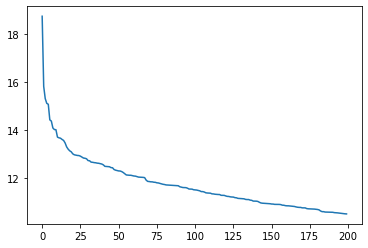

In [7]:
tag_popularity = book_tags.groupby('tag_id')['count'].sum()\
                                            .sort_values(0, ascending=False).reset_index().head(200)
plt.plot(tag_popularity.index, np.log(tag_popularity['count']))
plt.show()

In [8]:
tag_popularity = book_tags.groupby('tag_id')['count'].sum()\
                                            .sort_values(0, ascending=False).reset_index().head(200)
tags = tag_popularity.merge(tags, on=['tag_id'], how='left')\
                            .sort_values('count', ascending=False).reset_index()
tags

C:\Users\PROFES~1\AppData\Local\Temp/ipykernel_6644/745952186.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  tag_popularity = book_tags.groupby('tag_id')['count'].sum()\


index  tag_id      count                 tag_name
0        0   30574  140718761                  to-read
1        1    8717    7507958        currently-reading
2        2   11557    4503173                favorites
3        3   11743    3688819                  fiction
4        4   11305    3548157                  fantasy
..     ...     ...        ...                      ...
195    195   26842      37143  science-fiction-fantasy
196    196   30672      36839          to-read-fiction
197    197    2313      36470      american-literature
198    198    3611      36375            autobiography
199    199    9882      36216                  dragons

[200 rows x 4 columns]

**Идеи для user-item фичей**

* Количество совпавших тегов по книгам
* Совпадение по любимым авторам
* Есть ли книга в посмотреть позже?
* Средняя дальность до векторов любимых книг?
* 

In [16]:
tags_to_delete = tags[tags['count'] < 100_000]['tag_name'].values
tags_to_delete

array(['to-read', 'currently-reading', 'favorites', 'fiction', 'fantasy',
       'young-adult', 'classics', 'books-i-own', 'romance', 'owned', 'ya',
       'mystery', 'non-fiction', 'historical-fiction', 'series',
       'science-fiction', 'sci-fi', 'paranormal', 'kindle',
       'contemporary', 'book-club', 'library', 'favourites',
       'owned-books', 'horror', 'default', 'audiobook', 'urban-fantasy',
       'nonfiction', 'to-buy', 'adult', 'classic', 'childrens',
       'graphic-novels', 'thriller', 'audiobooks', 'ebook', 'vampires',
       'adventure', 'history', 'dystopian', 'audio', 'historical',
       'humor', 'novels', 'chick-lit', 'literature', 'dystopia',
       'my-books', 'paranormal-romance', 'children', 'ebooks', 'magic',
       'crime', 'comics', 'i-own', 'memoir', 'read-in-2015',
       'adult-fiction', 'children-s', 'sci-fi-fantasy', 'wish-list',
       'biography', 'my-library', 'read-in-2016', 'read-in-2014',
       'children-s-books', 'supernatural', 'manga', 'phi

In [ ]:
to_rm, to_save = book_tags[book_tags['tag'].isin(tags_to_remove)], book_tags[~book_tags['tag'].isin(tags_to_remove)]

In [ ]:
to_save['']

In [9]:
print(f"Уникальных юзеров в interactions: {ratings['user_id'].nunique():_}")
print(f"Уникальных книг в interactions: {ratings['book_id'].nunique():_}")

Уникальных юзеров в interactions: 53_424
Уникальных книг в interactions: 10_000


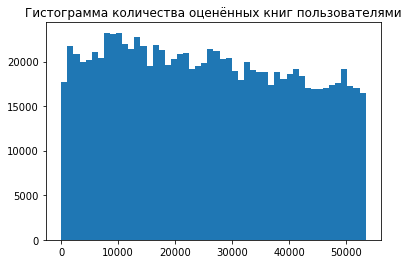

In [10]:
plt.title("Гистограмма количества оценённых книг пользователями")
plt.hist(ratings['user_id'], bins=50)
plt.show()

Как часто теги используются?
В нашем случае это будет что-то вроде заменителей жанров, поэтому лучше не пренебрегать анализом

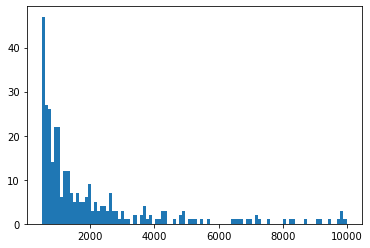

In [11]:
values = book_tags['tag_id'].value_counts().values
plt.hist(values[values > 500], bins=100)
plt.show()

**Странный факт**

Самые обычные книги почему-то оказались с отрицательными годами публикации

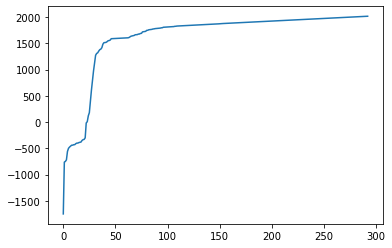

In [127]:
plt.plot(range(294), books['original_publication_year'].unique())
plt.show()

In [130]:
books[books['original_publication_year'] < 0][['title', 'original_publication_year']].head()

title  \
0            The Hunger Games (The Hunger Games, #1)   
1  Harry Potter and the Sorcerer's Stone (Harry P...   
2                            Twilight (Twilight, #1)   
3                              To Kill a Mockingbird   
4                                   The Great Gatsby   

   original_publication_year  
0                    -1750.0  
1                     -762.0  
2                     -750.0  
3                     -750.0  
4                     -720.0

### Разделим на train/test

In [9]:
def split_train_test(ratings, by_ratio=True, ratio=0.8, test_cnt=5):
    ratings['is_test'] = False
    if by_ratio:
        indx = np.random.choice(ratings.index, size=int((1 - ratio) * ratings.shape[0]), replace=False)
    else:
        indx = ratings.groupby("user_id").tail(test_cnt).index
    ratings.loc[indx, 'is_test'] = True
    return ratings[~ratings['is_test']].reset_index().drop(['is_test'], axis=1), \
           ratings[ratings['is_test']].reset_index().drop(['is_test'], axis=1)

train, test = split_train_test(ratings, by_ratio=False)
# Закинем проверку, что разделение верное
assert ratings.shape[0] == (train.shape[0] + test.shape[0])
print(train.shape, test.shape, )

(754390, 4) (227366, 4)


In [10]:
candgen_train, candgen_test = split_train_test(train, ratio=0.6)
candgen_test = candgen_test[candgen_test['user_id'].isin(candgen_train['user_id'].unique())]
print(candgen_train.shape, candgen_test.shape)

(452634, 5) (299430, 5)


## Само обучение

кандидатогенератор, который действительно нужно обучать - LigthFM

In [11]:
dataset = Dataset()
dataset.fit(candgen_train['user_id'].unique(), candgen_train['book_id'].unique())

In [12]:
# матрица взаимоодействий
interactions_matrix, weights_matrix = dataset.build_interactions(
    zip(*candgen_train[['user_id', 'book_id', 'rating']].values.T)
)

weights_matrix_csr = weights_matrix.tocsr()

In [263]:
# user / item mappings
lightfm_mapping = dataset.mapping()
lightfm_mapping = {
    'users_mapping': lightfm_mapping[0],
    'books_mapping': lightfm_mapping[2],
}

# там по умолчанию ключи - np.int64, а у нас всё с обычным int будет замечательно
lightfm_mapping['users_mapping'] = {int(k): v for k, v in lightfm_mapping['users_mapping'].items()}
lightfm_mapping['books_mapping'] = {int(k): v for k, v in lightfm_mapping['books_mapping'].items()}

path = "../data/temporal/lightfm/"
with open(path + "lightfm_mapping.json", "w") as f:
    json.dump(lightfm_mapping, f)

lightfm_mapping['users_inv_mapping'] = {v: int(k) for k, v in lightfm_mapping['users_mapping'].items()}
lightfm_mapping['books_inv_mapping'] = {v: int(k) for k, v in lightfm_mapping['books_mapping'].items()}

print(f"users_mapping amount: {len(lightfm_mapping['users_mapping'])}")
print(f"books_mapping amount: {len(lightfm_mapping['books_mapping'])}")

users_mapping amount: 31012
books_mapping amount: 10000


In [261]:
import json
path = "../data/temporal/lightfm/"
with open(path + "lightfm_mapping.json", "w") as f:
    json.dump(lightfm_mapping, f)

In [241]:
lfm_model = LightFM(
    no_components=64, 
    learning_rate=0.1, 
    loss='warp', 
    max_sampled=5, 
    random_state=42
)

num_epochs = 20

for _ in tqdm(range(num_epochs)):
    lfm_model.fit_partial(
        weights_matrix_csr
    )

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:37<00:00,  1.90s/it]


In [15]:
# save model
with open(f"../models/lfm_model.dill", 'wb') as f:
    dill.dump(lfm_model, f)

In [262]:
with open(path + "lightfm_mapping.json", "r") as f:
    mapper = json.load(f)
mapper['users_mapping']

{'30151': 0,
 '36896': 1,
 '47522': 2,
 '42560': 3,
 '50593': 4,
 '49514': 5,
 '35875': 6,
 '35001': 7,
 '47647': 8,
 '17188': 9,
 '15186': 10,
 '21492': 11,
 '42861': 12,
 '31560': 13,
 '35343': 14,
 '16510': 15,
 '19168': 16,
 '37127': 17,
 '681': 18,
 '22060': 19,
 '51163': 20,
 '11623': 21,
 '30731': 22,
 '875': 23,
 '5892': 24,
 '12592': 25,
 '11999': 26,
 '35146': 27,
 '49356': 28,
 '14519': 29,
 '8797': 30,
 '24326': 31,
 '10249': 32,
 '37097': 33,
 '52823': 34,
 '11545': 35,
 '14023': 36,
 '9932': 37,
 '44776': 38,
 '36206': 39,
 '20393': 40,
 '39266': 41,
 '17788': 42,
 '19677': 43,
 '34081': 44,
 '38756': 45,
 '22367': 46,
 '38928': 47,
 '8896': 48,
 '50240': 49,
 '32202': 50,
 '18587': 51,
 '19535': 52,
 '13827': 53,
 '7453': 54,
 '40283': 55,
 '46123': 56,
 '30761': 57,
 '21525': 58,
 '32180': 59,
 '36237': 60,
 '25551': 61,
 '36067': 62,
 '44025': 63,
 '17922': 64,
 '9829': 65,
 '48038': 66,
 '15581': 67,
 '47042': 68,
 '33307': 69,
 '36161': 70,
 '43611': 71,
 '29270': 72

**Создание кандидатов на основе lightfm**

In [242]:
# пустой датафрейм для предсказания
candidates = pd.DataFrame({
    'user_id': candgen_test['user_id'].unique()
})

candidates.head(3)

user_id
0    15359
1    18541
2    53292

In [243]:
def generate_lightfm_recs_mapper(model, item_ids, known_items, 
                                 user_features, item_features, N, 
                                 user_mapping, item_inv_mapping, 
                                 num_threads=1):
    def _recs_mapper(user):
        user_id = user_mapping[user]
        recs = model.predict(user_id, item_ids, user_features=user_features, 
                             item_features=item_features, num_threads=num_threads)
        
        additional_N = len(known_items[user_id]) if user_id in known_items else 0
        total_N = N + additional_N
        top_cols = np.argpartition(recs, -np.arange(total_N))[-total_N:][::-1]
        
        final_recs = [item_inv_mapping[item] for item in top_cols]
        if additional_N > 0:
            filter_items = known_items[user_id]
            final_recs = [item for item in final_recs if item not in filter_items]
        return final_recs[:N]
    return _recs_mapper

# кол-во кандидатов
top_N = 30

# вспомогательные данные
all_cols = list(lightfm_mapping['books_mapping'].values())

mapper = generate_lightfm_recs_mapper(
    lfm_model,
    item_ids=all_cols,
    known_items=dict(),
    N=top_N,
    user_features=None,
    item_features=None,
    user_mapping=lightfm_mapping['users_mapping'],
    item_inv_mapping=lightfm_mapping['books_inv_mapping'],
    num_threads=20
)

In [244]:
# генерируем предказания
candidates['book_id'] = candidates['user_id'].map(mapper)
candidates = candidates.explode('book_id')
candidates['rank'] = candidates.groupby('user_id').cumcount() + 1 
candidates['candgen'] = 'lightfm'

candidates.head()

user_id book_id  rank  candgen
0    15359    6507     1  lightfm
0    15359    9977     2  lightfm
0    15359    4988     3  lightfm
0    15359    4032     4  lightfm
0    15359    3053     5  lightfm

In [150]:
# оставляем только теплых пользователей
test = test[test['user_id'].isin(candgen_train['user_id'].unique())]
# кол-во кандидатов берем больше, чем для обучения
# чтобы катбусту было, что ранжировать
top_N = 200

lfm_prediction = pd.DataFrame({
    'user_id': test['user_id'].unique()
})

known_items = candgen_train.groupby('user_id')['book_id'].apply(list).to_dict()

mapper = generate_lightfm_recs_mapper(
    lfm_model, 
    item_ids=all_cols, 
    known_items=known_items,
    N=top_N,
    user_features=None, 
    item_features=None, 
    user_mapping=lightfm_mapping['users_mapping'],
    item_inv_mapping=lightfm_mapping['books_inv_mapping'],
    num_threads=20
)

lfm_prediction['book_id'] = lfm_prediction['user_id'].map(mapper)
lfm_prediction = lfm_prediction.explode('book_id').reset_index(drop=True)
lfm_prediction['rank'] = lfm_prediction.groupby('user_id').cumcount() + 1
lfm_prediction['candgen'] = 'lightfm'

In [245]:
path = "../data/temporal/lightfm/"

# Возможно, нам и не нужно всё это сохранять, 
# Но это удобно, поэтому просто сохраню всё, что есть)
with open(path + "all_cols.json", "w") as f:
    json.dump(all_cols, f)

with open(path + "known_books.json", "w") as f:
    json.dump(known_items, f)

In [21]:
# Внаглую взято из курса your_second_recsys, lesson 5
def compute_metrics(df_true, df_pred, top_N, rank_col='rank'):
    result = {}
    test_recs = df_true.set_index(['user_id', 'book_id']).join(df_pred.set_index(['user_id', 'book_id']))
    test_recs = test_recs.sort_values(by=['user_id', rank_col])

    test_recs['users_item_count'] = test_recs.groupby(level='user_id')[rank_col].transform(np.size)
    test_recs['reciprocal_rank'] = (1 / test_recs[rank_col]).fillna(0)
    test_recs['cumulative_rank'] = test_recs.groupby(level='user_id').cumcount() + 1
    test_recs['cumulative_rank'] = test_recs['cumulative_rank'] / test_recs[rank_col]
    
    users_count = test_recs.index.get_level_values('user_id').nunique()
    for k in range(1, top_N + 1):
        hit_k = f'hit@{k}'
        test_recs[hit_k] = test_recs[rank_col] <= k
        result[f'Precision@{k}'] = (test_recs[hit_k] / k).sum() / users_count
        result[f'Recall@{k}'] = (test_recs[hit_k] / test_recs['users_item_count']).sum() / users_count

    result[f'MAP@{top_N}'] = (test_recs["cumulative_rank"] / test_recs["users_item_count"]).sum() / users_count
    result[f'MRR'] = test_recs.groupby(level='user_id')['reciprocal_rank'].max().mean()
    return pd.Series(result)

In [151]:
lfm_metrics = compute_metrics(test[['user_id', 'book_id']],
                              lfm_prediction, 
                              top_N=10)
lfm_metrics

Precision@1     0.008029
Recall@1        0.001606
Precision@2     0.008239
Recall@2        0.003295
Precision@3     0.008878
Recall@3        0.005327
Precision@4     0.008835
Recall@4        0.007068
Precision@5     0.008971
Recall@5        0.008971
Precision@6     0.009136
Recall@6        0.010963
Precision@7     0.009195
Recall@7        0.012872
Precision@8     0.009130
Recall@8        0.014607
Precision@9     0.009151
Recall@9        0.016471
Precision@10    0.009087
Recall@10       0.018174
MAP@10          0.010671
MRR             0.034982
dtype: float64

Генерация необучаемыми кандидатогенераторами

In [165]:
def random_candgen(users, books, count=5):
    result = pd.DataFrame({'user_id': np.tile(users, count),
                           'book_id': np.random.choice(books, count * len(users)),
                           'rank': count, # Этому генератору мы не сильно верим -> ранг самый последний из возможных
                           'candgen': 'random_candgen'}) # полезно сохранить источник
    return result.sort_values(['user_id', 'book_id'])
random_candgen(user_ids, book_ids, 5)

user_id  book_id  rank         candgen
114482        1     1545     5  random_candgen
7634          1     3222     5  random_candgen
61058         1     7847     5  random_candgen
221330        1     9609     5  random_candgen
167906        1     9994     5  random_candgen
...         ...      ...   ...             ...
60494     53424      127     5  random_candgen
220766    53424     1260     5  random_candgen
113918    53424     3206     5  random_candgen
7070      53424     6288     5  random_candgen
167342    53424     7587     5  random_candgen

[267120 rows x 4 columns]

In [182]:
np.save("../data/temporal/book_ids.npy", book_ids)

In [173]:
def popularity_candgen(users, ratings, count=5):
    top_books = ratings['book_id'].value_counts().reset_index().head(count)['index'].values
    result = pd.DataFrame({'user_id': np.tile(users, count, axis=1),
                           'book_id': np.repeat(top_books, users.shape[0], axis=1),
                           'rank': np.repeat(np.arange(1, count+1), users.shape[0], axis=1),
                           'candgen': 'popularity_candgen'})
    return result.sort_values(['user_id', 'book_id', 'rank'])
popularity_candgen(user_ids, ratings, 5)

user_id  book_id  rank             candgen
7634          1        1     1  popularity_candgen
61058         1     5198     2  popularity_candgen
167906        1     5214     4  popularity_candgen
114482        1     5215     3  popularity_candgen
221330        1     9803     5  popularity_candgen
...         ...      ...   ...                 ...
7070      53424        1     1  popularity_candgen
60494     53424     5198     2  popularity_candgen
167342    53424     5214     4  popularity_candgen
113918    53424     5215     3  popularity_candgen
220766    53424     9803     5  popularity_candgen

[267120 rows x 4 columns]

In [270]:
np.tile(np.array([314]), 1)

array([314])

In [224]:
top_books = ratings['book_id'].value_counts().reset_index()
top_books.columns = ['book_id', 'count']
top_books.to_csv("../data/temporal/popular_books.csv")
top_books.head()

book_id  count
0        1    100
1     5198    100
2     5215    100
3     5214    100
4     9803    100

In [186]:
top_books = ratings.groupby('book_id')['rating'].mean().reset_index()\
                       .sort_values(['rating'], ascending=False)\
                       .reset_index().drop(['index'], axis=1)
top_books.to_csv("../data/temporal/top_rating_books.csv")
top_books.head()

book_id    rating
0     7947  4.820225
1     6920  4.780000
2     5207  4.780000
3     9566  4.777778
4     8946  4.774194

In [272]:
def rating_candgen(users, ratings, count=5):
    top_books = ratings.groupby('book_id')['rating'].mean().reset_index()\
                       .sort_values(['rating'], ascending=False).head(count)['book_id'].values
    result = pd.DataFrame({'user_id': np.tile(users, count),
                           'book_id': np.repeat(top_books, users.shape[0], axis=1),
                           'rank': np.repeat(np.arange(1, count+1), users.shape[0]),
                           'candgen': 'rating_candgen'})
    return result.sort_values(['user_id', 'book_id', 'rank'])
rating_candgen(np.array([314]), ratings, 5)

AxisError: axis 1 is out of bounds for array of dimension 1

Object `sort_values` not found.


In [ ]:
ratings.groupby('book_id')['rating'].sum().reset_index().sort_values

## 2 этап: бустинг

target = 1: всё, что пользователь прочитал

target = 0: насемплированные книги из тех, что он не смотрел

In [25]:
pos = candidates.merge(candgen_test,
                        on=['user_id', 'book_id'],
                        how='inner')

pos['target'] = 1
print(pos.shape)
pos.head()

(18294, 7)


user_id book_id  rank  level_0  index  rating  target
0    53292     263     5   504823  26299       5       1
1    53292     386    15   745197  38597       5       1
2    53292     117    17   377494  11699       5       1
3    53292       6    18   181378    599       5       1
4    53292     173    19   316959  17299       5       1

In [26]:
neg = candidates.set_index(['user_id', 'book_id'])\
        .join(candgen_test.set_index(['user_id', 'book_id']))

neg = neg[neg['rating'].isnull()].reset_index()

neg = neg.sample(frac=0.07)
neg['target'] = 0

neg.shape

(57351, 7)

In [28]:
ctb_train_users, ctb_test_users = train_test_split(candgen_test['user_id'].unique(),
                                                  random_state=1,
                                                  test_size=0.2)

In [29]:
# выделяем 10% под механизм early stopping
ctb_train_users, ctb_eval_users = train_test_split(ctb_train_users,
                                                  random_state=1,
                                                  test_size=0.1)

In [33]:
select_col = ['user_id', 'book_id', 'rank', 'target']

# Catboost train
ctb_train = shuffle(
    pd.concat([
        pos[pos['user_id'].isin(ctb_train_users)],
        neg[neg['user_id'].isin(ctb_train_users)]
])[select_col]
)

# Catboost test
ctb_test = shuffle(
    pd.concat([
        pos[pos['user_id'].isin(ctb_test_users)],
        neg[neg['user_id'].isin(ctb_test_users)]
])[select_col]
)

# for early stopping
ctb_eval = shuffle(
    pd.concat([
        pos[pos['user_id'].isin(ctb_eval_users)],
        neg[neg['user_id'].isin(ctb_eval_users)]
])[select_col]
)

In [34]:
ctb_train['target'].value_counts(normalize=True)

0    0.758663
1    0.241337
Name: target, dtype: float64

In [35]:
ctb_test['target'].value_counts(normalize=True)

0    0.754913
1    0.245087
Name: target, dtype: float64

In [28]:
books[["id", "title", "authors", "image_url"]].to_dict(orient='records')

[{'id': 2767052,
  'title': 'The Hunger Games (The Hunger Games, #1)',
  'authors': 'Suzanne Collins',
  'image_url': 'https://images.gr-assets.com/books/1447303603m/2767052.jpg'},
 {'id': 3,
  'title': "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
  'authors': 'J.K. Rowling, Mary GrandPré',
  'image_url': 'https://images.gr-assets.com/books/1474154022m/3.jpg'},
 {'id': 41865,
  'title': 'Twilight (Twilight, #1)',
  'authors': 'Stephenie Meyer',
  'image_url': 'https://images.gr-assets.com/books/1361039443m/41865.jpg'},
 {'id': 2657,
  'title': 'To Kill a Mockingbird',
  'authors': 'Harper Lee',
  'image_url': 'https://images.gr-assets.com/books/1361975680m/2657.jpg'},
 {'id': 4671,
  'title': 'The Great Gatsby',
  'authors': 'F. Scott Fitzgerald',
  'image_url': 'https://images.gr-assets.com/books/1490528560m/4671.jpg'},
 {'id': 11870085,
  'title': 'The Fault in Our Stars',
  'authors': 'John Green',
  'image_url': 'https://images.gr-assets.com/books/1360206420m/1187008

## feature generation

Фичи берём только по книгам, т.к о пользователях всё равно ничего не знаем

О книгах тоже знаем не так много, но хоть что-то есть

In [77]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [78]:
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

In [105]:
feature_cols = ['id', 'book_id', 'work_id', 'books_count',
                'isbn13', 'original_publication_year', 'average_rating', 
                'ratings_count', 'work_ratings_count', 'work_text_reviews_count', 
                'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']
train_features = ctb_train.merge(books[feature_cols], on=['book_id'], how='left')
eval_features = ctb_eval.merge(books[feature_cols], on=['book_id'], how='left')

In [106]:
train_features.head()

user_id book_id  rank  target        id   work_id  books_count  \
0    48809     637     7       1     76778   4636013          271   
1    19520    7273     4       0  15771862  21480584           36   
2    23793    3862    17       1   7091713   7241833           27   
3    37002    9679    11       0    290882    162727          112   
4    10231     589    21       0  16056408  19113823           53   

         isbn13  original_publication_year  average_rating  ratings_count  \
0  9.780553e+12                     1950.0            4.12         143236   
1           NaN                     2013.0            3.70          12008   
2  9.780451e+12                     2010.0            4.22          33464   
3  9.780140e+12                     -500.0            4.20           7365   
4  9.780425e+12                     2012.0            4.11         133937   

   work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  \
0              156328                     5204       1666       5808   
1               13198                     2128        466       1217   
2               35314                      980        327       1116   
3                9667                      258         87        341   
4              189861                    11189       4496       8142   

   ratings_3  ratings_4  ratings_5  
0      28385      56556      63913  
1       3512       4626       3377  
2       6065      10828      16978  
3       1669       2993       4577  
4      31038      64085      82100

In [281]:
drop_col = ['user_id', 'book_id']
target_col = ['target']
# Полезная кат.фича - генератор, из которого получили кандидатов
cat_col = []

In [282]:
X_train, y_train = train_features.drop(drop_col + target_col, axis=1), train_features[target_col]
X_val, y_val = eval_features.drop(drop_col + target_col, axis=1), eval_features[target_col]

In [283]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((54426, 15), (54426, 1), (6106, 15), (6106, 1))

In [284]:
# fillna for catboost with the most frequent value
X_train = X_train.fillna(X_train.mode().iloc[0])
X_val = X_val.fillna(X_train.mode().iloc[0])

In [280]:
X_train.mode().iloc[0].to_csv("../data/temporal/mode_values.csv")

In [119]:
X_train.head()

rank        id   work_id  books_count        isbn13  \
0     7     76778   4636013          271  9.780553e+12   
1     4  15771862  21480584           36  9.780312e+12   
2    17   7091713   7241833           27  9.780451e+12   
3    11    290882    162727          112  9.780140e+12   
4    21  16056408  19113823           53  9.780425e+12   

   original_publication_year  average_rating  ratings_count  \
0                     1950.0            4.12         143236   
1                     2013.0            3.70          12008   
2                     2010.0            4.22          33464   
3                     -500.0            4.20           7365   
4                     2012.0            4.11         133937   

   work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  \
0              156328                     5204       1666       5808   
1               13198                     2128        466       1217   
2               35314                      980        327       1116   
3                9667                      258         87        341   
4              189861                    11189       4496       8142   

   ratings_3  ratings_4  ratings_5  
0      28385      56556      63913  
1       3512       4626       3377  
2       6065      10828      16978  
3       1669       2993       4577  
4      31038      64085      82100

### Учим CatboostClassifier

Позже стоит попробовать ranker

In [285]:
from catboost import CatBoostClassifier

# параметры для обучения
est_params = {
  'subsample': 0.9,
  'max_depth': 5,
  'n_estimators': 2000,
  'learning_rate': 0.1,
  'thread_count': 20,
  'random_state': 42,
  'verbose': 200,
}

ctb_model = CatBoostClassifier(**est_params)

In [291]:
ctb_model.fit(X_train,
              y_train,
              eval_set=(X_val, y_val),
              early_stopping_rounds=100,
              cat_features=cat_col,
              plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6579463	test: 0.6568253	best: 0.6568253 (0)	total: 21.5ms	remaining: 42.9s
200:	learn: 0.4695859	test: 0.4712252	best: 0.4712252 (200)	total: 1.04s	remaining: 9.32s
400:	learn: 0.4524916	test: 0.4664079	best: 0.4664079 (400)	total: 2.04s	remaining: 8.15s
600:	learn: 0.4398786	test: 0.4651870	best: 0.4651586 (599)	total: 3.04s	remaining: 7.08s
800:	learn: 0.4292192	test: 0.4641284	best: 0.4641284 (800)	total: 4.05s	remaining: 6.07s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.4637074299
bestIteration = 871

Shrink model to first 872 iterations.


In [209]:
with open(f"../models/ctb_model.dill", 'wb') as f:
    dill.dump(ctb_model, f)

In [210]:
with open(f"../models/ctb_model.dill", 'rb') as f:
    ctb = dill.load(f)

In [140]:
import shap
from catboost import Pool

# сэмплируем для shap_values
X_train_subs, _, y_train_subs, __ = train_test_split(X_train, y_train,
                                                     test_size=0.9,
                                                     random_state=42)
# считаем shap_values
shap_values = ctb_model.get_feature_importance(Pool(X_train_subs, y_train_subs,
                                                   cat_features=cat_col), type='ShapValues')

expected_value = shap_values[0, -1]
shap_values = shap_values[:, :-1]

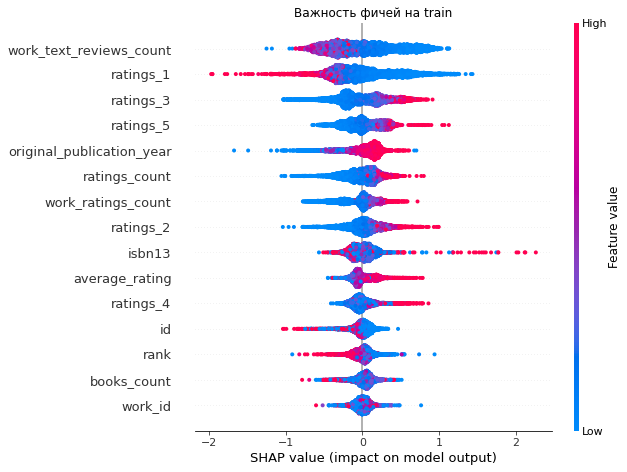

In [141]:
plt.title("Важность фичей на train")

shap.summary_plot(
    shap_values,
    X_train_subs
)

## Оценка метрик моделей

**Только catboost**

In [277]:
test_features = ctb_test.merge(books[feature_cols], on=['book_id'], how='left')
# fillna for catboost with the most frequent value
test_features = test_features.fillna(X_train.mode().iloc[0])

In [145]:
X_test, y_test = test_features.drop(drop_col + target_col, axis=1), test_features['target']
X_test.head()

rank        id   work_id  books_count        isbn13  \
0    16     16697    243634           42  9.780061e+12   
1    16   2049993   2054929           30  9.780141e+12   
2    17  17167084  23594240           25  9.780313e+12   
3     9     11564   1836389          115  9.781417e+12   
4     8     30281   3349934           74  9.780425e+12   

   original_publication_year  average_rating  ratings_count  \
0                     2001.0            3.63          19778   
1                     2011.0            4.14          15257   
2                     2001.0            4.41          24325   
3                     1956.0            3.56          95768   
4                     1961.0            4.02         104252   

   work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  \
0               22220                     1661        395       1952   
1               16323                     1347        197        619   
2               28475                     3475        223        540   
3              103156                     3281       3658      12231   
4              115174                     4842       3154       6494   

   ratings_3  ratings_4  ratings_5  
0       7277       8515       4081  
1       2855       5757       6895  
2       2549       9225      15938  
3      33253      30730      23284  
4      22437      35934      47155

In [146]:
from sklearn.metrics import roc_auc_score

y_pred = ctb_model.predict_proba(X_test)
f"ROC AUC score = {roc_auc_score(y_test, y_pred[:, 1]):.2f}"

'ROC AUC score = 0.73'

In [153]:
lfm_ctb_prediction = lfm_prediction.copy()

# фичи для теста
score_feat = lfm_ctb_prediction.merge(books[feature_cols],
                                       on=['book_id'],
                                       how='left')

# fillna for catboost with the most frequent value
score_feat = score_feat.fillna(X_train.mode().iloc[0])

In [154]:
# catboost predict_proba
ctb_prediction = ctb_model.predict_proba(score_feat.drop(drop_col, axis=1, errors='ignore'))

lfm_ctb_prediction['ctb_pred'] = ctb_prediction[:, 1]
lfm_ctb_prediction.head(3)

user_id book_id  rank  ctb_pred
0    26399    2779     1  0.295683
1    26399    2330     2  0.409667
2    26399    2748     3  0.300072

In [155]:
lfm_prediction.sort_values(
    by=['user_id'], ascending=[True]).head(10)

user_id book_id  rank
5900699        7    4182   100
5900727        7    6190   128
5900728        7    8742   129
5900729        7    1812   130
5900730        7    2385   131
5900731        7    3672   132
5900732        7    6249   133
5900733        7     612   134
5900734        7     751   135
5900735        7    2452   136

In [211]:
lfm_prediction

user_id book_id  rank
0          26399    2779     1
1          26399    2330     2
2          26399    2748     3
3          26399    5850     4
4          26399    2913     5
...          ...     ...   ...
6202395    24582     261   196
6202396    24582    2449   197
6202397    24582     982   198
6202398    24582     372   199
6202399    24582     560   200

[6202400 rows x 3 columns]

In [156]:
# сортируем по скору внутри одного пользователя и проставляем новый ранг
lfm_ctb_prediction = lfm_ctb_prediction.sort_values(
    by=['user_id', 'ctb_pred'], ascending=[True, False])
lfm_ctb_prediction['rank_ctb'] = lfm_ctb_prediction.groupby('user_id').cumcount() + 1

In [157]:
model_2step_metrics = compute_metrics(test[['user_id', 'book_id']],
                                       lfm_ctb_prediction, 
                                       top_N=10, 
                                       rank_col='rank_ctb')
model_2step_metrics

Precision@1     0.007255
Recall@1        0.001451
Precision@2     0.007626
Recall@2        0.003050
Precision@3     0.007653
Recall@3        0.004592
Precision@4     0.007779
Recall@4        0.006223
Precision@5     0.007810
Recall@5        0.007810
Precision@6     0.007701
Recall@6        0.009242
Precision@7     0.007702
Recall@7        0.010783
Precision@8     0.007590
Recall@8        0.012144
Precision@9     0.007610
Recall@9        0.013698
Precision@10    0.007633
Recall@10       0.015265
MAP@10          0.010080
MRR             0.030942
dtype: float64

In [213]:
lfm_prediction

user_id book_id  rank
0          26399    2779     1
1          26399    2330     2
2          26399    2748     3
3          26399    5850     4
4          26399    2913     5
...          ...     ...   ...
6202395    24582     261   196
6202396    24582    2449   197
6202397    24582     982   198
6202398    24582     372   199
6202399    24582     560   200

[6202400 rows x 3 columns]

In [214]:
lfm_ctb_prediction

user_id book_id  rank  ctb_pred  rank_ctb
5900793        7    2109   194  0.799586         1
5900735        7    2452   136  0.786780         2
5900723        7    2271   124  0.769407         3
5900734        7     751   135  0.741202         4
5900771        7    2501   172  0.682146         5
...          ...     ...   ...       ...       ...
2477186    53424    9647   187  0.022688       196
2477033    53424    8648    34  0.021928       197
2477078    53424    8700    79  0.020242       198
2477163    53424    6213   164  0.018961       199
2477175    53424    6278   176  0.013211       200

[6202400 rows x 5 columns]

In [158]:
df_metrics = pd.concat([
    pd.DataFrame(lfm_metrics).transpose(),
    pd.DataFrame(model_2step_metrics).transpose()
])

df_metrics.index = ['lightfm', 'model_2step']

df_metrics

Precision@1  Recall@1  Precision@2  Recall@2  Precision@3  \
lightfm         0.008029  0.001606     0.008239  0.003295     0.008878   
model_2step     0.007255  0.001451     0.007626  0.003050     0.007653   

             Recall@3  Precision@4  Recall@4  Precision@5  Recall@5  ...  \
lightfm      0.005327     0.008835  0.007068     0.008971  0.008971  ...   
model_2step  0.004592     0.007779  0.006223     0.007810  0.007810  ...   

             Precision@7  Recall@7  Precision@8  Recall@8  Precision@9  \
lightfm         0.009195  0.012872      0.00913  0.014607     0.009151   
model_2step     0.007702  0.010783      0.00759  0.012144     0.007610   

             Recall@9  Precision@10  Recall@10    MAP@10       MRR  
lightfm      0.016471      0.009087   0.018174  0.010671  0.034982  
model_2step  0.013698      0.007633   0.015265  0.010080  0.030942  

[2 rows x 22 columns]

In [32]:
def MAP_at_K(y_pred, y, K=5):
    joint = y_pred.join(y, on=['user_id', 'book_id'])
    return joint
MAP_at_K(random_candgen(user_ids, book_ids, 5), candgen_test)

ValueError: len(left_on) must equal the number of levels in the index of "right"